## Model Comparison & Selection
  ### This script compares different models for Named Entity Recognition (NER) on Amharic text data from @sinayelj Telegram channel.

- Finetune multiple models
- Evaluate the fine-tuned models on the validation set
- Compare models based on accuracy, speed, and robustness
- Select the best-performing model for production



  


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
scripts_path = '/content/drive/MyDrive/train_sample/scripts'

In [ ]:
# Add the correct scripts folder path
import sys
sys.path.append('/content/drive/MyDrive/train_sample/scripts')

In [ ]:
! pip install datasets
! pip install seqeval==0.0.10

In [ ]:
# import all functions from our script
from model_comparison import *

In [ ]:
#  Load and prepare the data
file_path = '/content/drive/MyDrive/train_sample/labeled_ner_data.conll'

In [ ]:
#Load and prepare the data
sentences, labels = load_conll_data(file_path)
dataset = prepare_dataset(sentences, labels)

In [ ]:
selected_columns = dataset.select_columns(['tokens', 'ner_tags'])
print(selected_columns)


Dataset({
    features: ['tokens', 'ner_tags'],
    num_rows: 1340
})


In [ ]:
# printing the 'tokens' and 'ner_tags' columns
tokens = dataset['tokens']
ner_tags = dataset['ner_tags']

# Print the first 5 entries as an example
for i in range(5):
    print(f"Tokens: {tokens[i]}")
    print(f"NER Tags: {ner_tags[i]}")


Tokens: ['ለኮንዶሚኒየም', 'ለጠባብ', 'ቤቶች', 'ገላግሌ', 'የሆነ', 'ከንፁህ', 'የሲልከን', 'ጥሬ', 'እቃ', 'የተሰራ', 'የልጆች', 'ማጠቢያ', 'ምስሉ', 'ላይ', 'እንደሚያዩት', 'መታጠፍ', 'መዘርጋት', 'የሚችል', '3350ብር', 'ይደውሉልን', 'እርሶ', 'መምጣት', 'ባይመቾ', 'እኛ', 'ያሉበት', 'ድረስ', 'እናደርስሎታለን', 'ስልክ', '0905707448', '0909003864', 'ሲና', 'የተመረጡና', 'ጥራታቸውን', 'የጠበቁ', 'የልጆች', 'እቃ', 'አስመጪ', '0909003864', '0905707448', 'እቃ', 'ለማዘዝ', 'ከስር', 'ያለውን', 'ሊንኮች', 'በመጫን', 'ማዘዝ', 'ትችላላቹ', '@', '@2', 'አድራሻ', 'ቁጥር', 'ገርጂ', 'ኢምፔሪያል', 'ከሳሚ', 'ህንፃ', 'ጎን', 'አልፎዝ', 'ፕላዛ', 'ግራውንድ', 'ላይ', 'እንደገቡ', 'ያገኙናል', '2ቁጥር2', '4ኪሎ', 'ቅድስት', 'ስላሴ', 'ህንፃ', 'ማለትም', 'ከብልፅግና', 'ዋናፅፈት', 'ቤት', 'ህንፃ', 'በስተ', 'ቀኝ', 'ባለው', 'አስፓልት', '20ሜትር', 'ዝቅ', 'እንዳሉ', 'ሀበሻ', 'ኮፊ', 'የሚገኝበት', 'ቀይ', 'ሸክላ', 'ህንፃ', '2ተኛ', 'ፎቅ', 'ላይ', 'ያገኙናል', '3ቁጥር3', 'ብስራተ', 'ገብርኤል', 'ላፍቶ', 'ሞል', 'መግቢያው', 'ፊት', 'ለፊት', 'የሚገኘው', 'የብስራተ', 'ገብርኤል', 'ቤተ', 'ክርስቲያን', 'ህንፃ', 'አንደኛ', 'ፎቅ', 'ላይ', 'ደረጃ', 'እንደወጣቹ', 'በስተግራ', 'በኩል', 'ሱቅ', 'ቁጥር', '-09', 'ክቡራን', 'ደምበኞቻችን', 'ገርጂ', 'አልፎዝ', 'ፕላዛ', 'ላይ', 'አራት', 'ኪሎ', 'ቅድስት', 'ስላሴ', 'እንዲሁም', 'ብስራተ', 'ገ

In [ ]:
# Split into train and evaluation sets
df = pd.DataFrame(dataset)
train_dataset, eval_dataset = train_test_split(df, test_size=0.2, random_state=42)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Evaluation dataset size: {len(eval_dataset)}")

Train dataset size: 1072
Evaluation dataset size: 268


In [ ]:
# Define Models to Compare
models_to_compare = [
      "xlm-roberta-base",
      "distilbert-base-multilingual-cased",
      "bert-base-multilingual-cased"
    ]

In [ ]:
# #  Define label encoding
label_list, label2id, id2label = get_label_encodings()

In [ ]:
# Fine-tune and Evaluate Models
print("\n3. Fine-tune and Evaluate Models")
results = []

for model_name in models_to_compare:
  print(f"Training and evaluating {model_name}")
  result = finetune_and_evaluate(model_name, train_dataset, eval_dataset, label_list, label2id, id2label)
  results.append(result)
  print(f"Completed {model_name}\n")


3. Fine-tune and Evaluate Models
Training and evaluating xlm-roberta-base


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkp

Map:   0%|          | 0/1072 [00:00<?, ? examples/s]

Map:   0%|          | 0/268 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.162408
2,No log,0.080641
3,No log,0.067612


Completed xlm-roberta-base

Training and evaluating distilbert-base-multilingual-cased


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/1072 [00:00<?, ? examples/s]

Map:   0%|          | 0/268 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.423608
2,No log,0.356305
3,No log,0.331172


Completed distilbert-base-multilingual-cased

Training and evaluating bert-base-multilingual-cased


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/1072 [00:00<?, ? examples/s]

Map:   0%|          | 0/268 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.431166
2,No log,0.341079
3,No log,0.293828


Completed bert-base-multilingual-cased



In [ ]:
# Compare Results
print("\n4. Compare Results")
for result in results:
   print(f"Model: {result['model_name']}")
   print(f"Eval Loss: {result['eval_loss']}")
   print(f"Training Time: {result['training_time']} seconds")
   print("Classification Report:")
   print(result['classification_report'])
   print("---\n")


4. Compare Results
Model: xlm-roberta-base
Eval Loss: 0.06761186569929123
Training Time: 135.95039582252502 seconds
Classification Report:
           precision    recall  f1-score   support

      LOC       0.96      0.91      0.94       349
    Price       0.96      1.00      0.98        67
  Product       0.71      0.70      0.71       252

micro avg       0.86      0.84      0.85       668
macro avg       0.87      0.84      0.85       668

---

Model: distilbert-base-multilingual-cased
Eval Loss: 0.33117151260375977
Training Time: 63.20461392402649 seconds
Classification Report:
           precision    recall  f1-score   support

      LOC       0.09      0.03      0.04       787
  Product       0.87      0.38      0.53       295
    Price       0.69      0.69      0.69        67

micro avg       0.42      0.15      0.23      1149
macro avg       0.33      0.15      0.20      1149

---

Model: bert-base-multilingual-cased
Eval Loss: 0.2938281297683716
Training Time: 109.6074714660


5. Visualize Results
Results visualization saved as 'model_comparison_results.png'


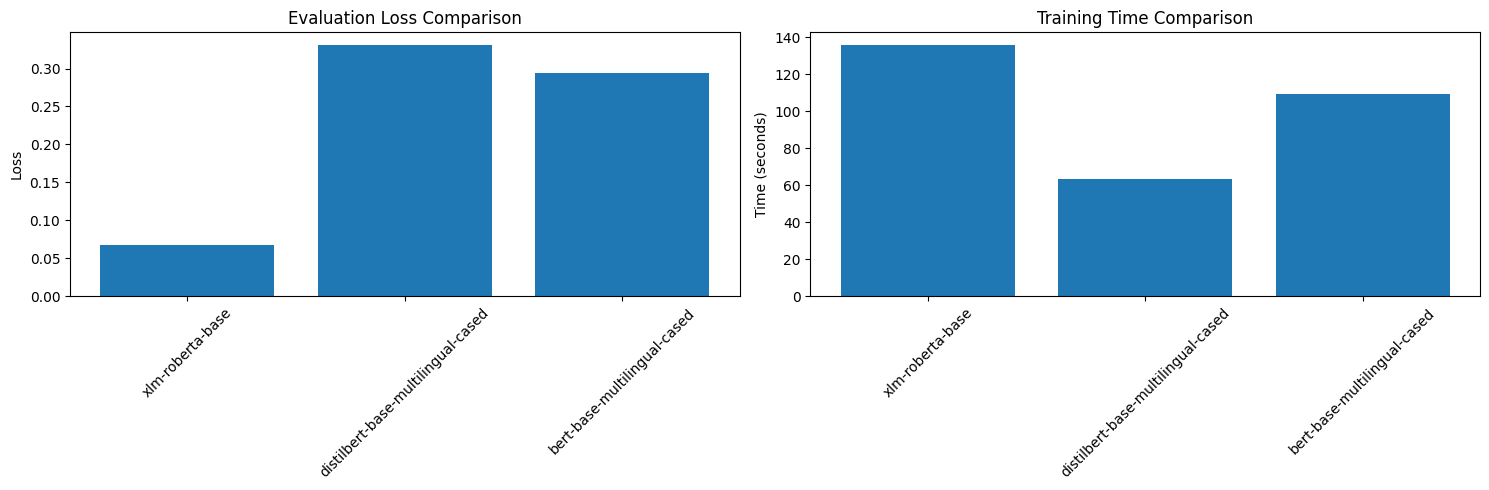

In [ ]:
# 5. Visualize Results
print("\n5. Visualize Results")
model_names = [result['model_name'] for result in results]
eval_losses = [result['eval_loss'] for result in results]
training_times = [result['training_time'] for result in results]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(model_names, eval_losses)
ax1.set_title('Evaluation Loss Comparison')
ax1.set_ylabel('Loss')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(model_names, training_times)
ax2.set_title('Training Time Comparison')
ax2.set_ylabel('Time (seconds)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('model_comparison_results.png')
print("Results visualization saved as 'model_comparison_results.png'")

In [ ]:
# Select Best Model
print("\n6. Select Best Model")
best_model = min(results, key=lambda x: x['eval_loss'])
print(f"Best model based on evaluation loss: {best_model['model_name']}")


6. Select Best Model
Best model based on evaluation loss: xlm-roberta-base


In [ ]:
# Save best model
best_model['model'].save_pretrained(f"./best_model_{best_model['model_name'].split('/')[-1]}")
best_model['tokenizer'].save_pretrained(f"./best_model_{best_model['model_name'].split('/')[-1]}")
print(f"Best model saved to: ./best_model_{best_model['model_name'].split('/')[-1]}")

Best model saved to: ./best_model_xlm-roberta-base


In [ ]:
# 7. Test Best Model on Sample Text
sample_text = "ለኮንዶሚኒየም ለጠባብ ቤቶች ገላግሌ የሆነ ከንፁህ የሲልከን ጥሬ እቃ የተሰራ"
predictions = predict_ner(sample_text, best_model['model'], best_model['tokenizer'], id2label)

In [ ]:
print("NER Predictions:")
for token, label in predictions:
  print(f"{token}: {label}")

NER Predictions:
<s>: O
▁ለ: O
ኮ: O
ን: O
ዶ: O
ሚኒ: O
የም: O
▁: O
ለጠ: O
ባብ: O
▁ቤቶች: O
▁: O
ገላ: O
ግ: O
ሌ: O
▁የሆነ: O
▁: O
ከን: O
ፁ: O
ህ: O
▁የ: O
ሲ: O
ል: O
ከን: O
▁ጥ: O
ሬ: O
▁እ: B-Product
ቃ: O
▁የተ: O
ሰራ: O
</s>: O
